### Orderbooks and Asset Pricing

## Question 1 : Building Order Book class

In [ ]:
# Convert Mac pickles to Windows pickle
original = "./THO"
destination = "./data/THO"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

print("Done. Saved %s bytes." % (len(content)-outsize))

In [294]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns

class Orderbook:
    """An orderbook class.
    Attributes:
    data (DataFrame): Price, quantity and type of order.
    timestamp (int): date
    """
    def __init__(self, data): # This function is the constructor.
        """Set the name and initialize an empty list of contents.
        Parameters:
        data (dict): dictionary including price, quantity and direction
        """
        self.timestamp = data[0]
        frame = pd.DataFrame.from_dict(data[1], orient="index")
        frame = frame.drop(columns=[2, 3])
        frame['Price'] = frame.index
        frame.rename(columns={0:"Quantity", 1:"Order"}, inplace=True)
        frame = frame[np.abs(frame.Price-frame.Price.mean()) < (2*frame.Price.std())]
        frame = frame[frame["Quantity"] < frame["Quantity"].quantile(0.90)]
        frame['Selling'] = (frame['Order'] == "S")*1 - (frame['Order'] == "B")*1
        frame.index = range(len(frame))
        frame['Orders'] = frame['Selling'] * frame['Quantity']
        self.data = frame
        maxv = frame[frame['Order'] == "B"]['Price'].max()
        minv = frame[frame['Order'] == "S"]['Price'].min()
        self.midpoint = (minv + maxv)/2


    def get_params(self):
        """Estimate Kyle Model on order book"""
        X = self.data['Price']
        X = sm.add_constant(X)
        model = sm.OLS(self.data['Orders'],X)
        results = model.fit()
        return results.params
        
    
    def plot(self):
        """Plot the order book and the estimated equation"""
        color = 'r' if (self.data['Selling'] ==1).all() else 'g'
        self.data.plot(kind='scatter', x='Price', y='Orders')
        sns.regplot(x="Price", y="Orders", data=self.data)


In [264]:
import pandas as pd
import pickle

AAPL = pd.read_pickle('./data/AAPL')
C = pd.read_pickle('./data/C')
GBX = pd.read_pickle('./data/GBX')
SPY = pd.read_pickle('./data/SPY')
THO = pd.read_pickle('./data/THO')

const   -999.396985
Price     22.553426
dtype: float64


43.275

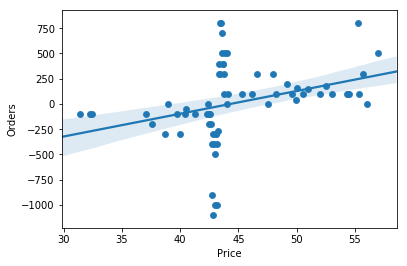

In [295]:

#get date
#print(AAPL[5][0])

#get all data
#print(AAPL[5][1])

# get price
#print(AAPL[5][1].keys())

# get the order
#print(AAPL[5][1][0])

#get the number of share
#print(AAPL[5][1][0][0])

#get the number of share
#print(AAPL[5][1][0][0])


data = GBX[10]
# print(AAPL[5][1])
# test1 = pd.DataFrame.from_dict(data[1], orient="index")
# print(test1[0])


test = Orderbook(data)

print(test)
print(test.get_params())
test.plot()
test.midpoint

## Question 2: Plot estimated market liquidity

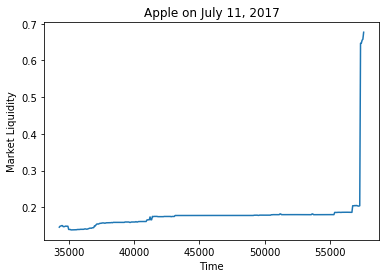

In [266]:
liquidity = []
time = []
for i, item in enumerate(AAPL):
    book = Orderbook(item)
    liquidity.append(book.get_params()[1])
    time.append(book.timestamp)
    
plt.plot(time, liquidity)
plt.title('Apple on July 11, 2017')
plt.ylabel('Market Liquidity')
plt.xlabel('Time')
plt.show()


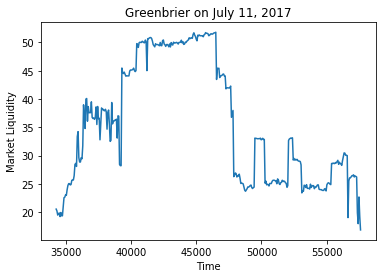

In [268]:
liquidity = []
time = []
for i, item in enumerate(GBX):
    book = Orderbook(item)
    liquidity.append(book.get_params()[1])
    time.append(book.timestamp)
    
plt.plot(time, liquidity)
plt.title('Greenbrier on July 11, 2017')
plt.ylabel('Market Liquidity')
plt.xlabel('Time')
plt.show()

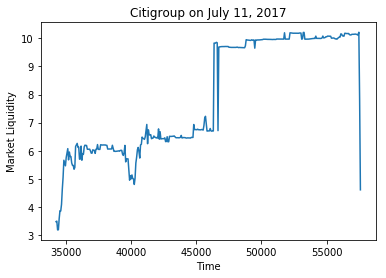

In [269]:
liquidity = []
time = []
for i, item in enumerate(C):
    book = Orderbook(item)
    liquidity.append(book.get_params()[1])
    time.append(book.timestamp)
    
plt.plot(time, liquidity)
plt.title('Citigroup on July 11, 2017')
plt.ylabel('Market Liquidity')
plt.xlabel('Time')
plt.show()

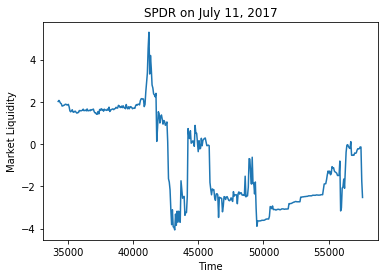

In [274]:
liquidity = []
time = []
for i, item in enumerate(SPY):
    book = Orderbook(item)
    liquidity.append(book.get_params()[1])
    time.append(book.timestamp)
    
plt.plot(time, liquidity)
plt.title('SPDR on July 11, 2017')
plt.ylabel('Market Liquidity')
plt.xlabel('Time')
plt.show()

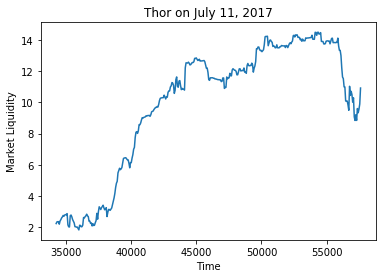

In [272]:
liquidity = []
time = []
for i, item in enumerate(THO):
    book = Orderbook(item)
    liquidity.append(book.get_params()[1])
    time.append(book.timestamp)
    
plt.plot(time, liquidity)
plt.title('Thor on July 11, 2017')
plt.ylabel('Market Liquidity')
plt.xlabel('Time')
plt.show()

### Question 3

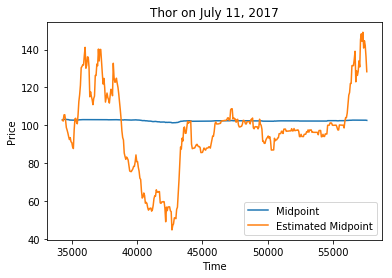

In [301]:
p0 = []
midpoint = []
time = []
for i, item in enumerate(THO):
    book = Orderbook(item)
    p0.append(-book.get_params()[0]/book.get_params()[1])
    midpoint.append(book.midpoint)
    time.append(book.timestamp)
    
# Timeperiod = pd.date_range("08:00", "17:30", freq="1min")
plt.plot(time, midpoint)
plt.plot(time, p0)
plt.title('Thor on July 11, 2017')
plt.ylabel('Price')
plt.legend(['Midpoint', 'Estimated Midpoint'])
plt.xlabel('Time')
plt.show()

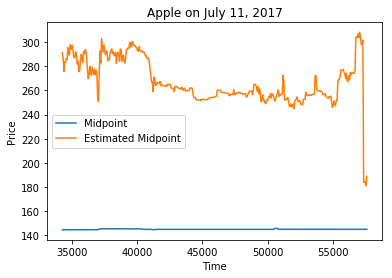

In [302]:
p0 = []
midpoint = []
time = []
for i, item in enumerate(AAPL):
    book = Orderbook(item)
    p0.append(-book.get_params()[0]/book.get_params()[1])
    midpoint.append(book.midpoint)
    time.append(book.timestamp)
    
# Timeperiod = pd.date_range("08:00", "17:30", freq="1min")
plt.plot(time, midpoint)
plt.plot(time, p0)
plt.title('Apple on July 11, 2017')
plt.ylabel('Price')
plt.legend(['Midpoint', 'Estimated Midpoint'])
plt.xlabel('Time')
plt.show()

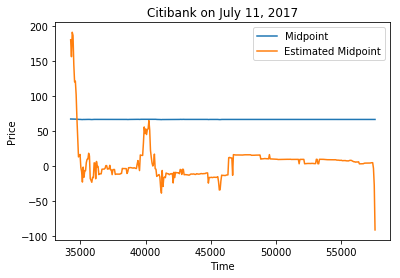

In [303]:
p0 = []
midpoint = []
time = []
for i, item in enumerate(C):
    book = Orderbook(item)
    p0.append(-book.get_params()[0]/book.get_params()[1])
    midpoint.append(book.midpoint)
    time.append(book.timestamp)
    
# Timeperiod = pd.date_range("08:00", "17:30", freq="1min")
plt.plot(time, midpoint)
plt.plot(time, p0)
plt.title('Citibank on July 11, 2017')
plt.ylabel('Price')
plt.legend(['Midpoint', 'Estimated Midpoint'])
plt.xlabel('Time')
plt.show()

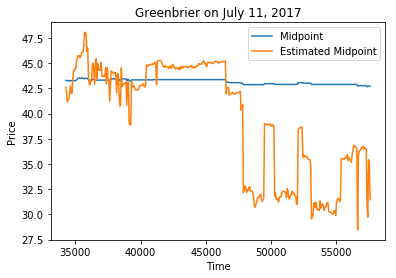

In [304]:
p0 = []
midpoint = []
time = []
for i, item in enumerate(GBX):
    book = Orderbook(item)
    p0.append(-book.get_params()[0]/book.get_params()[1])
    midpoint.append(book.midpoint)
    time.append(book.timestamp)
    
# Timeperiod = pd.date_range("08:00", "17:30", freq="1min")
plt.plot(time, midpoint)
plt.plot(time, p0)
plt.title('Greenbrier on July 11, 2017')
plt.ylabel('Price')
plt.legend(['Midpoint', 'Estimated Midpoint'])
plt.xlabel('Time')
plt.show()